In [ ]:
#se cargan las bibliotecas requeridas
import pandas as pd
import numpy as np

#visualización
import seaborn as sns
import matplotlib.pyplot as plt

#biblioteca de visualización
sns.set(style="white", color_codes=True)

In [ ]:
#se carga el Dataset
datasetPath = '/content/Iris.csv'
#Importing the Iris dataset as a Dataframe (a table):
iris = pd.read_csv(datasetPath)

##View ris data below:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# se realiza una exploración del dataset,cuantas filas, valores de tendencia central, mínimo, máximo
#Cuántas especies de plantas existen
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#miramos la columna Target
Species = list(iris['Species'].unique())
print(Species)

['setosa', 'versicolor', 'virginica']


In [ ]:
#contmos por especie
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


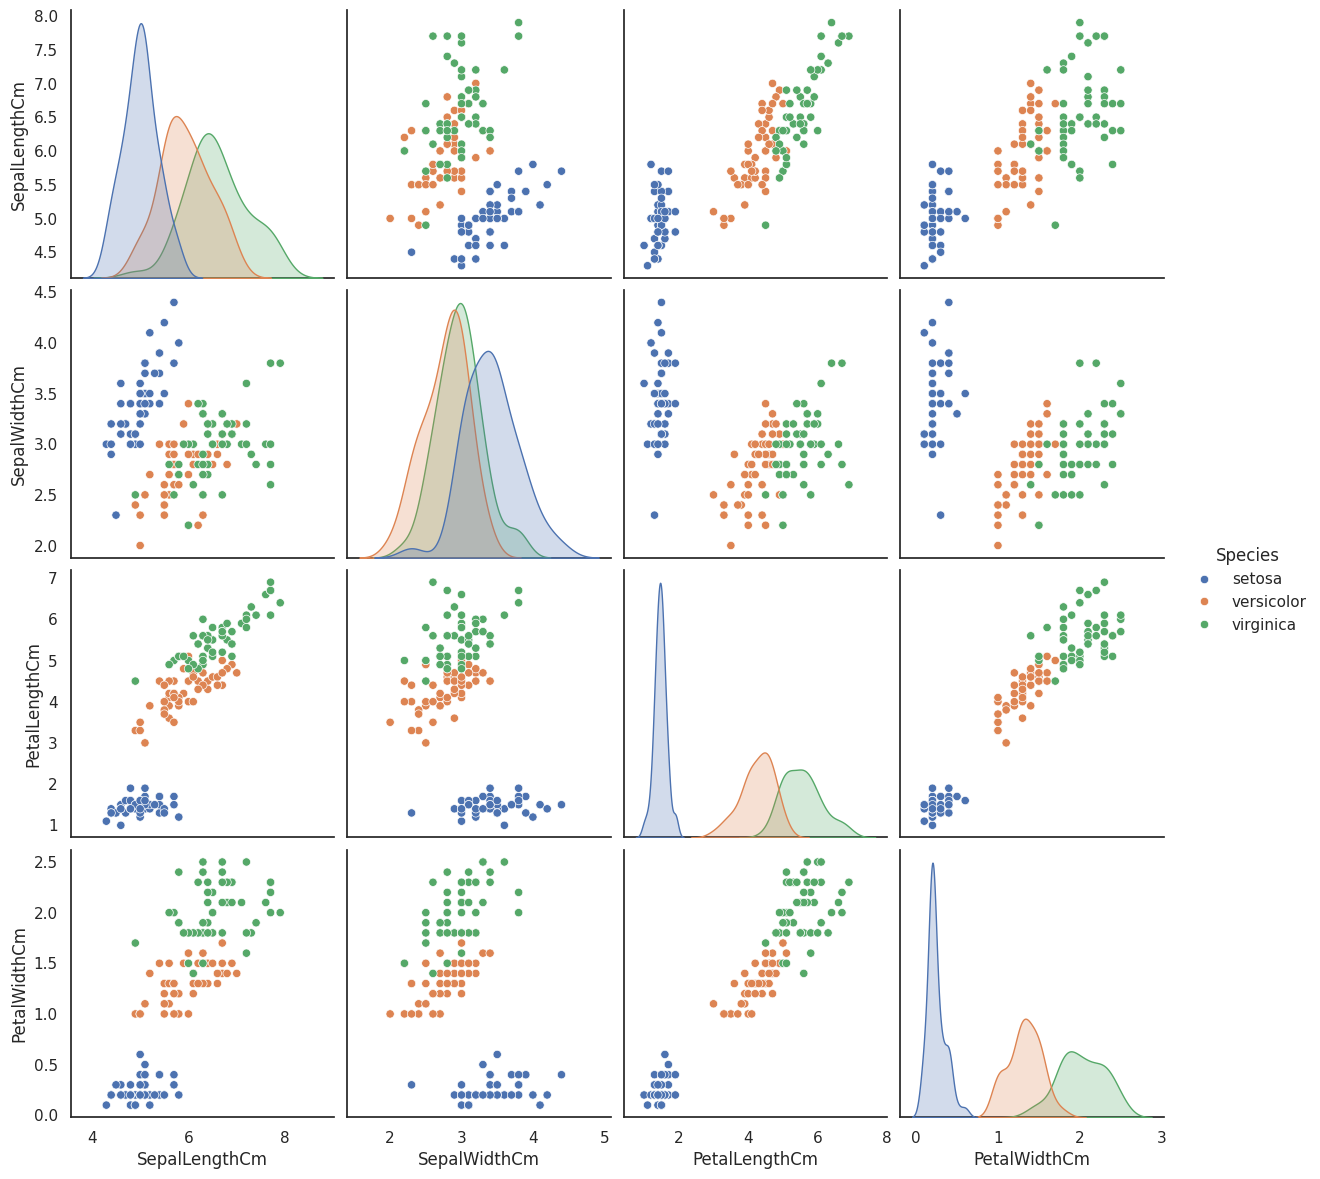

In [ ]:
#visualizamos el comportamiento de los datos
sns.pairplot(iris, hue="Species", size=3)
plt.show()

In [ ]:
#importamos el modelo

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#importar dependencia para permitir dividir el conjunto de datos
from sklearn.model_selection import train_test_split

#separamos las variables independientes de las dependientes
X1 = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm']].values
y = iris['Species']

#prueba uno, dividimos los datos en conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.1, stratify = y, random_state=42)


In [ ]:
#Se entrena el modelo con K=10
#entrenamos el modelo, con los datos de entrenamiento

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Se particiona para hacer diferentes pruebas al conjunto de entrenamiento
#parte el conjunto de entrenamiento en varias secciones

from sklearn import model_selection

#Proporciona índices de entrenamiento/prueba para dividir datos en conjuntos de entrenamient0

from sklearn.model_selection import KFold
#exactitud
scoring = 'accuracy'

#partimos en 5 pruebas
KFold = model_selection.KFold(n_splits=5)

# lanzamos las pruebas 5 veces, en las que partimos el conjunto de datos
cv_results = model_selection.cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=KFold, scoring=scoring)
print(cv_results)

[0.92592593 0.92592593 0.92592593 0.92592593 0.96296296]


In [ ]:
#realizamos una predicción basados en el conjunto de entrenamiento
resultadoYTrain = neigh.predict(X_train)

In [ ]:
#Se hace prueba con la matriz de confusión
#Es una herramienta útil para valorar cuan bueno es el modelo de clasificación basado en aprendizaje automatico
# muestra cuando una clase esta confundida con otra, permitiendo trabajar de forma separa con distintos tipos de error.

from sklearn.metrics import confusion_matrix

confusion_matrix(resultadoYTrain, y_train)

array([[45,  0,  0],
       [ 0, 43,  4],
       [ 0,  2, 41]])

In [ ]:
# Ahora con el conjunto de prueba con los datos que no se conocen, se realiza predicción  basados en conjunto de entrenamiento

resultadoYTtest  = neigh.predict(X_test)
confusion_matrix(resultadoYTtest, y_test)



array([[5, 0, 0],
       [0, 4, 0],
       [0, 1, 5]])

In [ ]:
# se realiza prueba con nuevo dato

nuevodato = [10,9,9]
X = np.array([nuevodato])
resultado = neigh.predict(X)[0]
print(resultado)

virginica
